In [ ]:
# 가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합
# plot 메소드에 kind = 'barh' 입력

C:\Users\mpm51\AppData\Local\Temp\ipykernel_33520\2946363553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_33520\2946363553.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


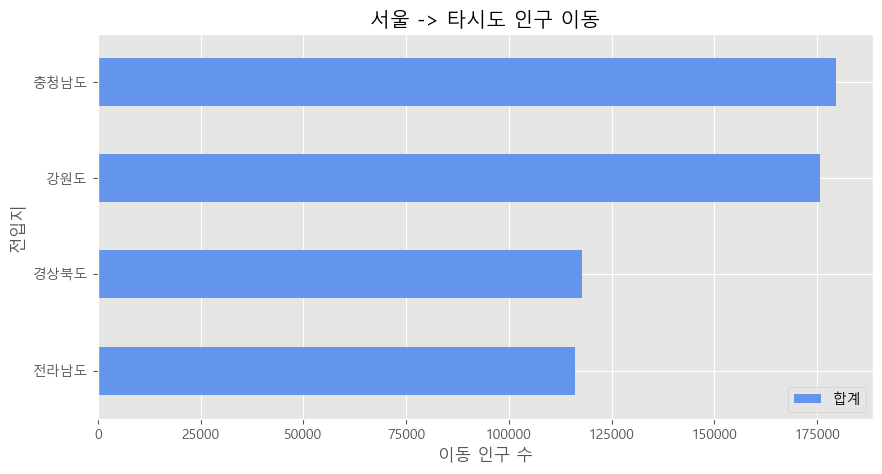

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

## 10 - 17년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis = 1)
# .sum() 함수는 데이터프레임에서 합계를 구하는 함수.
# axis=1 → 행(row) 방향으로 합계를 계산.
# df_4['합계'] 이 계산된 값을 데이터프레임에 새로운 열 '합계'로 추가
# 가장 큰 값부터 정렬 
df_total = df_4[['합계']].sort_values(by='합계', ascending = True)

plt.style.use('ggplot')

## 면적 그래프 그리기 # alpha 는 투명도, stacked는 누적되지 않고 서로 겹치도록 표시되어 선 그래프를 동일한 화면에 여러개
# 그린 것 처럼 표시됨
## 면적 그래프 axe 객체 생성
df_total.plot(kind = 'barh', figsize = (10,5), width = 0.5,
          color = 'cornflowerblue')

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()